In [ ]:
!pip install scipy

In [ ]:
!pip install pydub

In [ ]:
!pip install numpy

In [ ]:
!pip install matplotlib

In [42]:
import scipy.io.wavfile
from pydub import AudioSegment
from pydub.silence import split_on_silence
import numpy as np
import matplotlib.pyplot as plt

c:\Users\user\Python\.venv\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
rate, data = scipy.io.wavfile.read('ptk_2.wav')

In [3]:
print(f"shape of channels = {data.shape}")
print(data.dtype)

shape of channels = (643392,)
int16


In [30]:
time = np.arange(0, len(data)) / rate
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

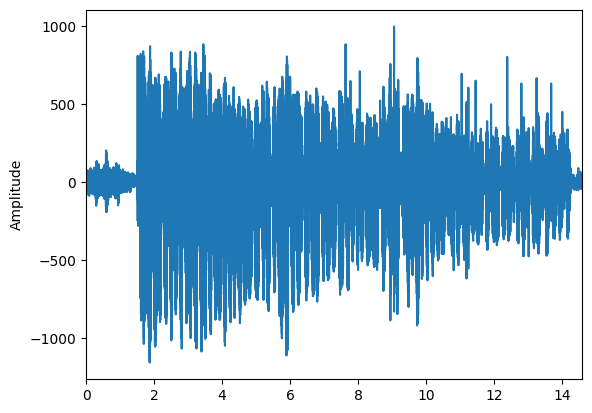

In [31]:
plt.ylabel("Amplitude")
plt.xlim(0, len(data) / rate)
plt.plot(time, data)

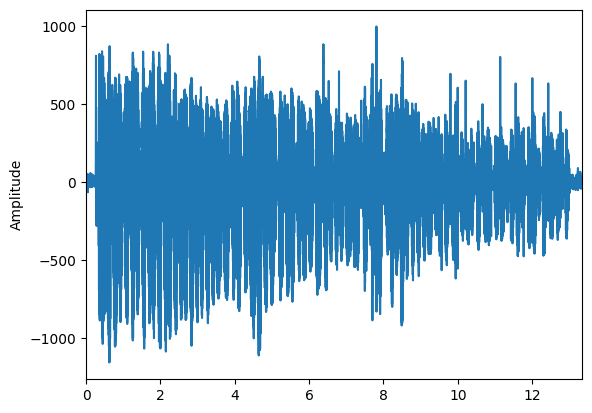

In [40]:
# set starting time to 1.25s
start_time = int(1.25*rate)
plt.ylabel("Amplitude")
plt.xlim(0, len(data[start_time:]) / rate)
plt.plot(time[start_time:]-time[start_time], data[start_time:])

In [43]:
audio_segment = AudioSegment(
    data[start_time:].tobytes(), 
    frame_rate=rate,
    sample_width=data.dtype.itemsize, 
    channels=1
)

In [44]:
# split wav file into syllables
chunks = split_on_silence (
    audio_segment, 
    min_silence_len = 25,
    silence_thresh = -50,
    keep_silence=200)

num_ptk = len(chunks)//3
print(f'Count of "Pa Ta Ka": {num_ptk}')

Count of "Pa Ta Ka": 27


In [45]:
# sample chunks for checking
#for i, chunk in enumerate(chunks[:5]+chunks[-5:]):
#    chunk.export(f'chunk{i}.wav', format='wav')